In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import shutil
import cv2
import random
from tqdm import tqdm

import matplotlib.pyplot as plt


In [99]:
def bounding_box(img):
    bbox = []
    img_split = img.split('-')[3].split('_')
    for coor in img_split:
        bbox.append((int(coor.split('&')[0]),int(coor.split('&')[1])))
        # bbox = bbox[::-1]
    return np.float32([bbox[2],bbox[3],bbox[1],bbox[0]])
    # return np.float32(bbox)

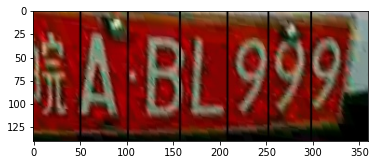

In [31]:
# tr_dir = 'classification_dataset/train/segmented_pieces'
# te_dir = 'classification_dataset/test/segmented_pieces'
# tr_list = os.listdir(tr_dir)
# te_list = os.listdir(te_dir)
# print(f"tr lengh {len(tr_list)} te length {len(te_list)}")
# for i in tr_list:
#     for j in te_list:
#         if(i == j):
#             print(i)

path = 'classification_dataset/new/val/'
segmentedPath = path + 'segmented_pieces/'

segmentedList = os.listdir(segmentedPath)

indice = 5
img_base = cv2.imread(path + 'segmented_image/' + segmentedList[indice])

pieces = []
for i in os.listdir(segmentedPath + segmentedList[indice]):
    pieces.append(cv2.imread(segmentedPath + segmentedList[indice] + '/' + i))
    

    

plt.imshow(img_base)

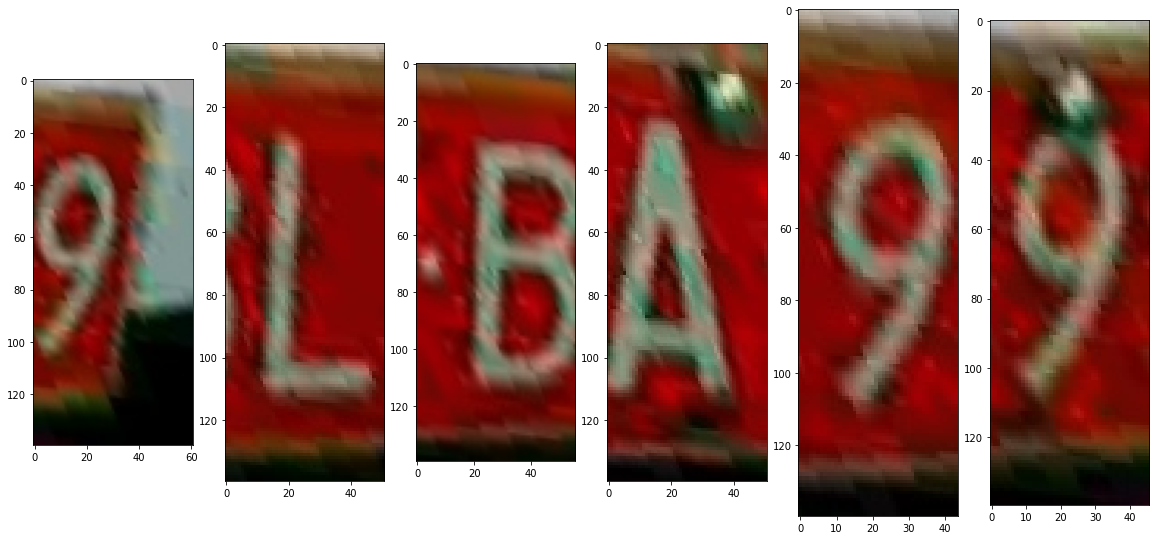

In [32]:
fig, axes = plt.subplots(1, 6, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip( pieces, axes):
    ax.imshow(img)
# plt.imshow(pieces[5])

In [85]:
int(np.random.rand(1)[0] * 100) + 5000

5043

In [3]:
import random

base_dir = '/home/mihai/TFG/ccpd_base/'
read_dir = 'dataset/dataset extract'
name_list = os.listdir(base_dir)
print(len(name_list))

random.shuffle(name_list)


310482


In [9]:

# En el formato de las mátriculas chinas el formato es PROVINCIA(SIMBOLO CHINO) - LETRA - NUM/LETRA (Todos los demás. La última posición se simboliza con una O, que significa que no hay carácteres ya que esa vocal no existe en china
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
             'X', 'Y', 'Z']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']



num = 0
dirname = 'classification_dataset/new/'
listdir = os.listdir(dirname)
# for dir in listdir:
#     shutil.rmtree(dirname + dir)

# create dir
original_dir = dirname + 'original'
perspective_dir = dirname + 'perspective'
segmented_image = dirname + 'segmented_image'
segmented_pieces = dirname + 'segmented_pieces'
all_characters_dir = dirname + 'all'

os.mkdir(original_dir)
os.mkdir(perspective_dir)
os.mkdir(segmented_image)
os.mkdir(segmented_pieces)
os.mkdir(all_characters_dir)

for val in ads:
    os.mkdir(all_characters_dir + '/' + val)

# 1k images: 700 train 100 val 200 test
# for index in tqdm(range(0,800)):
for index in tqdm(range(180000,225000)):
    img = cv2.imread(base_dir + name_list[index])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    box = bounding_box(name_list[index])

    heigth = 140
    width = 360

    pt1 = np.float32(box)
    pt2 = np.float32([[0,0], [width,0], [0,heigth], [width,heigth]])

    f = cv2.getPerspectiveTransform(pt1,pt2)
    f2 = cv2.warpPerspective(img,f,(width,heigth))

    he, wi,dm = f2.shape
    div = int(wi/7)

    divs = [i * div + 5 for i in range(1,7)]
    divs[0] = divs[0] - 5
    divs[1] = divs[1] - 5
    divs[-2] = divs[-2] - 7
    divs[-1] = divs[-1] - 12

    resultSeg = f2.copy()
    resultSeg2 = f2.copy()
    for i in divs:
        # divImgList.append(resultSeg)
        resultSeg[:,i-1:i+1] = 0


    cv2.imwrite(original_dir + '/' + name_list[index],cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    cv2.imwrite(perspective_dir + '/' + name_list[index],cv2.cvtColor(f2,cv2.COLOR_RGB2BGR))
    cv2.imwrite(segmented_image + '/' + name_list[index],cv2.cvtColor(resultSeg,cv2.COLOR_RGB2BGR))
    
    # segmentar cada una de las piezas
    pieces_dir = segmented_pieces + '/' +  name_list[index]
    os.mkdir(pieces_dir)

    for ind in range(0,len(divs)):
        if(ind == len(divs)-1):
            segImg = resultSeg2[:,divs[ind]:,:]
        else:
            segImg = resultSeg2[:,divs[ind]:divs[ind+1],:]
        # patron: imagen_XX/pos_caracter/indice_caracter || pos_caracter -> pos de izq a der en tabla || indice_caracter -> indice para mapear luego con la clase que es en un array
        cv2.imwrite(pieces_dir + '/' +  str(ind+1) + '_' + name_list[index].split('-')[-3].split('_')[ind] + '.jpg',cv2.cvtColor(segImg,cv2.COLOR_RGB2BGR))
        ads_index = int(name_list[index].split('-')[-3].split('_')[ind+1])
        # print(ads_index)
        if(ind == 0):
            cv2.imwrite(all_characters_dir + '/' + alphabets[ads_index] + '/' + str(index+ind+1) + '.jpg',cv2.cvtColor(segImg,cv2.COLOR_RGB2BGR))
        else:
            cv2.imwrite(all_characters_dir + '/' + ads[ads_index] + '/' + str(index+ind+1) + '.jpg',cv2.cvtColor(segImg,cv2.COLOR_RGB2BGR))

100%|██████████| 45000/45000 [19:47<00:00, 37.88it/s]


In [4]:
!ls classification_dataset/train

0  2  4  6  8  A  C  E	G  J  L  N  Q  S  U  W	Y
1  3  5  7  9  B  D  F	H  K  M  P  R  T  V  X	Z


In [12]:

dir = 'classification_dataset/test/'
charList = []
nameList = []
className = os.listdir(dir)
for i in className:
    nameList.append(i)
    charList.append(len(os.listdir(dir + '/' + i)))
# print(className)
print(nameList)
print(charList)
l2 = np.sort(charList)
print(l2)
np.max(charList)

['5', 'G', 'X', 'S', '9', 'R', 'K', 'Z', 'N', '3', 'B', '8', 'M', 'H', 'D', 'P', 'L', '0', 'Q', 'J', 'T', '2', 'Y', '6', 'V', 'W', 'F', '4', 'U', 'C', 'E', '1', 'A', '7']
[2222, 2024, 1893, 2304, 1867, 1820, 1633, 2045, 2198, 1986, 2157, 2300, 1827, 1778, 1768, 1716, 1868, 1687, 1649, 2178, 1538, 2409, 1659, 2451, 1751, 1666, 2283, 1809, 1904, 2262, 1796, 1761, 2132, 1778]
[1538 1633 1649 1659 1666 1687 1716 1751 1761 1768 1778 1778 1796 1809
 1820 1827 1867 1868 1893 1904 1986 2024 2045 2132 2157 2178 2198 2222
 2262 2283 2300 2304 2409 2451]


2451

In [110]:
for i in className:
    lista = os.listdir(dir + '/' + i)
    tam = 1500 + int(np.random.rand(1)[0] * 1000)
    if len(lista) > tam:
        for file in lista[tam:]:
            os.remove(dir + '/' + i + '/' + file)


In [111]:

charList = []
nameList = []
className = os.listdir(dir)
for i in className:
    nameList.append(i)
    charList.append(len(os.listdir(dir + '/' + i)))
# print(className)
print(nameList)
print(charList)
l2 = np.sort(charList)
print(l2)
np.max(charList)

['T', 'U', 'C', 'D', '4', '6', '9', 'R', '3', '0', 'M', 'B', 'J', 'G', 'K', '1', '2', 'S', 'Q', '8', 'V', 'P', 'W', 'L', 'F', 'N', '7', '5', 'Z', 'X', 'Y', 'A', 'E', 'H']
[1538, 1904, 2262, 1768, 1809, 2451, 1867, 1820, 1986, 1687, 1827, 2157, 2178, 2024, 1633, 1761, 2409, 2304, 1649, 2300, 1751, 1716, 1666, 1868, 2283, 2198, 1778, 2222, 2045, 1893, 1659, 2132, 1796, 1778]
[1538 1633 1649 1659 1666 1687 1716 1751 1761 1768 1778 1778 1796 1809
 1820 1827 1867 1868 1893 1904 1986 2024 2045 2132 2157 2178 2198 2222
 2262 2283 2300 2304 2409 2451]


2451

In [ ]:
import numpy as np
import h5py
from PIL import Image

hf = h5py.File('data.h5', 'w')

img_path = ''

ti = []
tm =[]

with open(img_path, 'rb') as img_f:
     binary_data = img_f.read() 

for i in os.listdir('data_new/train_images'): 
    ti.append(Image.open('data_new/train_images/' + i))
hf.create_dataset('train_images', data=ti)
# hf.create_dataset('train_masks', data=d1)

# hf.create_dataset('val_images', data=d2)
# hf.create_dataset('val_masks', data=d2)
hf.close()

FileNotFoundError: [Errno 2] No such file or directory: 'data_new2\\train_images\\01-89_92-300&547_485&612-496&612_301&613_297&552_492&551-0_0_28_32_30_31_33-140-41.jpg\\00340277777778-94_83-366&419_479&461-468&457_365&447_368&411_471&421-0_0_31_10_32_33_25-123-6.jpg'

In [ ]:
import numpy as np
import h5py
from PIL import Image
hf.close()
hf = h5py.File('data.h5', 'w')

base_path = 'data_new'

for i in os.listdir(base_path):   # read all the As'
    vid_name = os.path.join(base_path, i)
    grp = hf.create_group(vid_name)  # create a hdf5 group.  each group is one 'A'

    for k in os.listdir(vid_name):   # find all images inside a.
        img_path = os.path.join(vid_name, k)

        with open(img_path, 'rb') as img_f:  # open images as python binary
            binary_data = img_f.read()

        binary_data_np = np.asarray(binary_data)

        dset = grp.create_dataset(k, data=binary_data_np) # save it in the subgroup. each a-subgroup contains all the images.

hf.close()

In [ ]:
import h5py
f = h5py.File('data.h5', 'r')
print(list(f.keys()))
f.close()

['data_new\\test_images', 'data_new\\test_masks', 'data_new\\train_images', 'data_new\\train_masks', 'data_new\\val_images', 'data_new\\val_masks']
